Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9043 - loss: 0.3284 - val_accuracy: 0.9825 - val_loss: 0.0571
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9890 - val_loss: 0.0344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9902 - loss: 0.0333 - val_accuracy: 0.9910 - val_loss: 0.0290
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9899 - val_loss: 0.0326
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.9950 - loss: 0.0160 - val_accuracy: 0.9901 - val_loss: 0.0334
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9882 - loss: 0.0414

✅ Test Accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


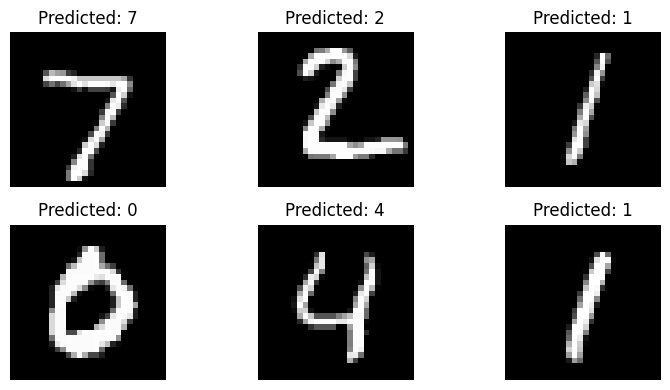

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input: (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")

# Predict on test set and visualize
predictions = model.predict(x_test)

plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
